## Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import prince

/home/amina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Dataset

In [2]:
df1 = pd.read_excel('WITS-Partner-2022.xlsx', engine='openpyxl')
df2 = pd.read_excel('WITS-Partner-2021.xlsx', engine='openpyxl')
df3 = pd.read_excel('WITS-Partner-2020.xlsx', engine='openpyxl')
df4 = pd.read_excel('WITS-Partner-2019.xlsx', engine='openpyxl')
df5 = pd.read_excel('WITS-Partner-2018.xlsx', engine='openpyxl')

df = pd.concat([df1, df2, df3, df4, df5])
df.head()

,Reporter Name,Partner Name,Year,Trade Flow,No Of exported HS6 digit Products,No Of imported HS6 digit Products,Export Share in Total Products (%),Import Share in Total Products (%),Trade Balance (US$ Thousand),Export (US$ Thousand),...,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand),No Of Tariff Agreement
0,World,Aruba,2022,Exports & Imports,2685.0,649,58.15,13.95,NaN,1541694.93,...,65.81,29.96,49.64,172.00,1487.24,0,10535.53,53151.51,0.0,2.0
1,World,Afghanistan,2022,Exports & Imports,2897.0,1594,62.75,34.26,NaN,7483942.10,...,69.82,25.45,21.87,104.74,3000.00,0,1116223.74,1524573.75,0.0,33.0
2,World,Angola,2022,Exports & Imports,3938.0,1810,85.29,38.91,NaN,14629831.87,...,67.91,27.59,28.48,142.34,3000.00,0,62085435.52,64812669.45,0.0,41.0
3,World,Anguila,2022,Exports & Imports,1288.0,451,27.90,9.69,NaN,287283.63,...,68.12,27.42,50.57,201.52,1355.58,0,5903.71,27273.40,0.0,6.0
4,World,Albania,2022,Exports & Imports,3857.0,2341,83.54,50.32,NaN,7328704.93,...,69.30,26.47,11.60,51.99,3000.00,0,4522619.11,7287158.04,0.0,12.0


In [3]:
df.columns

Index(['Reporter Name', 'Partner Name', 'Year', 'Trade Flow',
       'No Of exported HS6 digit Products',
       'No Of imported HS6 digit Products',
       'Export Share in Total Products (%)',
       'Import Share in Total Products (%)', 'Trade Balance (US$ Thousand)',
       'Export (US$ Thousand)', 'Import (US$ Thousand)',
       'Import Partner Share (%)', 'Export Partner Share (%)',
       'AHS Simple Average (%)', 'AHS Weighted Average (%)',
       'AHS Total Tariff Lines', 'AHS Dutiable Tariff Lines Share (%)',
       'AHS Duty Free Tariff Lines Share (%)',
       'AHS Specific Tariff Lines Share (%)', 'AHS AVE Tariff Lines Share (%)',
       'AHS MaxRate (%)', 'AHS MinRate (%)',
       'AHS SpecificDuty Imports(US$ Thousand)',
       'AHS Dutiable Imports (US$ Thousand)',
       'AHS Duty Free Imports (US$ Thousand)', 'MFN Simple Average (%)',
       'MFN Weighted Average (%)', 'MFN Total Tariff Lines',
       'MFN Dutiable Tariff Lines Share (%)',
       'MFN Duty Free Tariff

In [4]:
df.shape

(1235, 38)

### duplication and null values

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Reporter Name                                 0
Partner Name                                  0
Year                                          0
Trade Flow                                    0
No Of exported HS6 digit Products            39
No Of imported HS6 digit Products             0
Export Share in Total Products (%)           39
Import Share in Total Products (%)            0
Trade Balance (US$ Thousand)               1235
Export (US$ Thousand)                         4
Import (US$ Thousand)                         0
Import Partner Share (%)                      0
Export Partner Share (%)                      4
AHS Simple Average (%)                        0
AHS Weighted Average (%)                      0
AHS Total Tariff Lines                        0
AHS Dutiable Tariff Lines Share (%)           0
AHS Duty Free Tariff Lines Share (%)          0
AHS Specific Tariff Lines Share (%)           0
AHS AVE Tariff Lines Share (%)                0
AHS MaxRate (%)                         

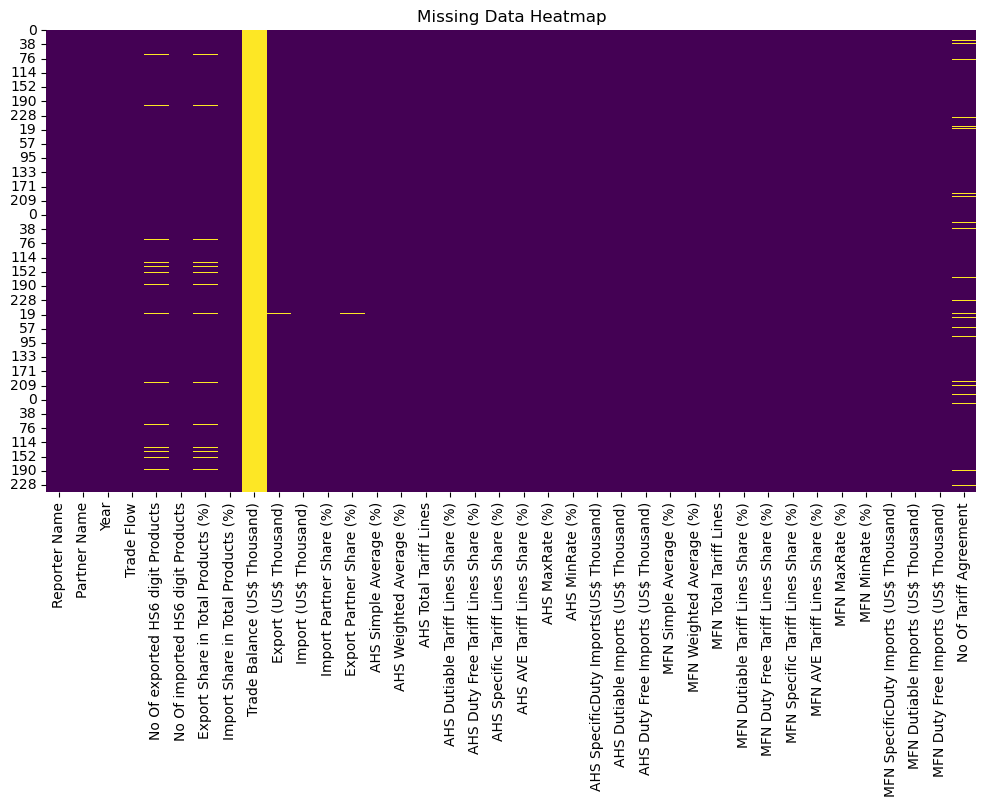

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [8]:
# replace nulls with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [9]:
df.isnull().sum()

Reporter Name                                 0
Partner Name                                  0
Year                                          0
Trade Flow                                    0
No Of exported HS6 digit Products             0
No Of imported HS6 digit Products             0
Export Share in Total Products (%)            0
Import Share in Total Products (%)            0
Trade Balance (US$ Thousand)               1235
Export (US$ Thousand)                         0
Import (US$ Thousand)                         0
Import Partner Share (%)                      0
Export Partner Share (%)                      0
AHS Simple Average (%)                        0
AHS Weighted Average (%)                      0
AHS Total Tariff Lines                        0
AHS Dutiable Tariff Lines Share (%)           0
AHS Duty Free Tariff Lines Share (%)          0
AHS Specific Tariff Lines Share (%)           0
AHS AVE Tariff Lines Share (%)                0
AHS MaxRate (%)                         

In [10]:
df = df.drop('Trade Balance (US$ Thousand)', axis=1)

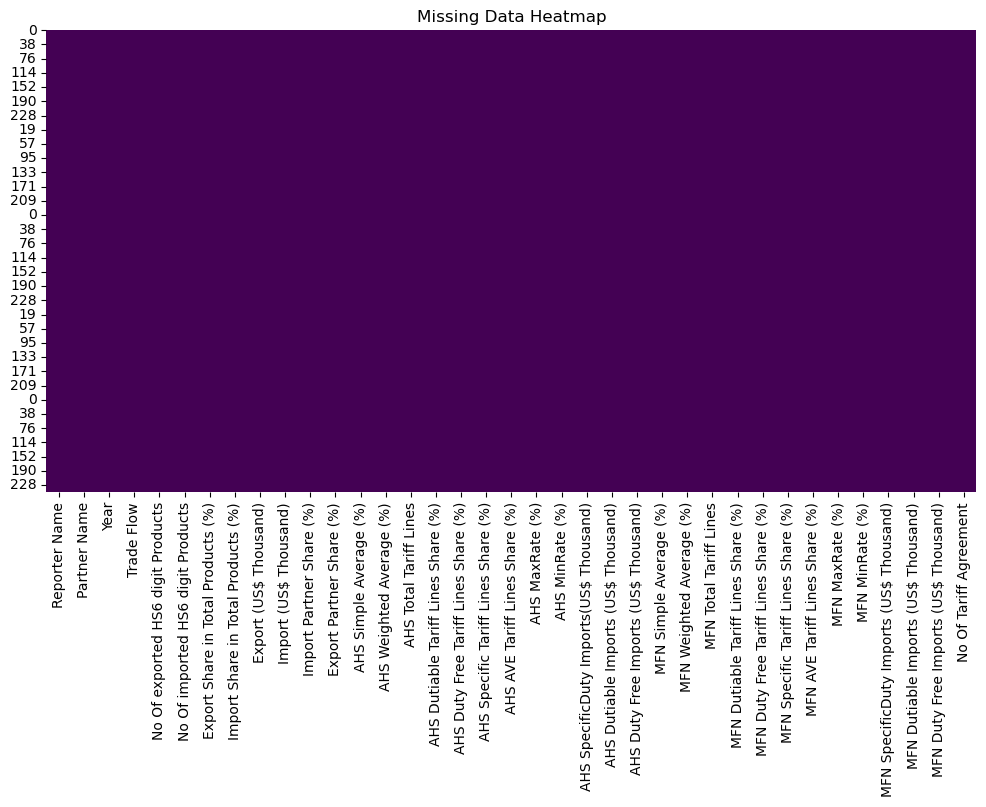

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [12]:
df.shape

(1235, 37)

### data visualization

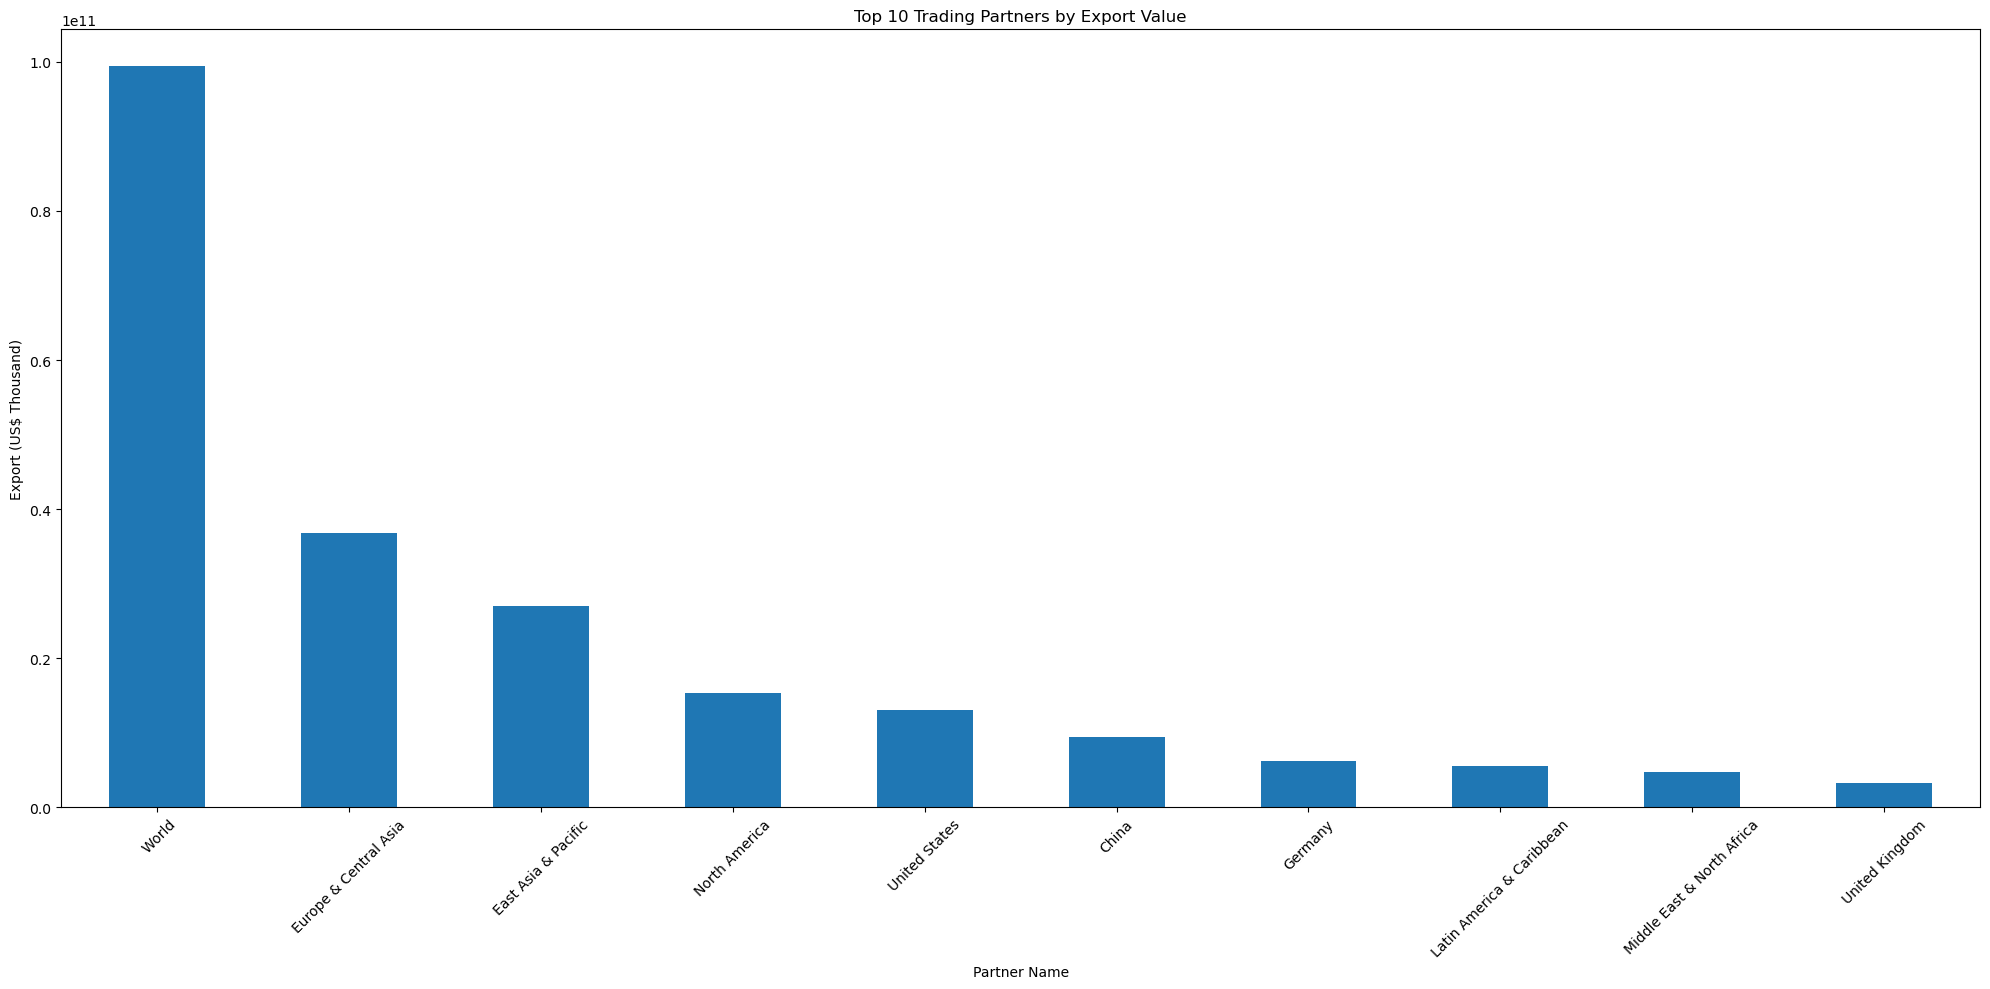

In [13]:
top_partners = df.groupby('Partner Name')['Export (US$ Thousand)'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(20, 10))
top_partners.plot(kind='bar', ax=ax)
ax.set_title("Top 10 Trading Partners by Export Value")
ax.set_ylabel("Export (US$ Thousand)")
ax.set_xlabel("Partner Name")
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

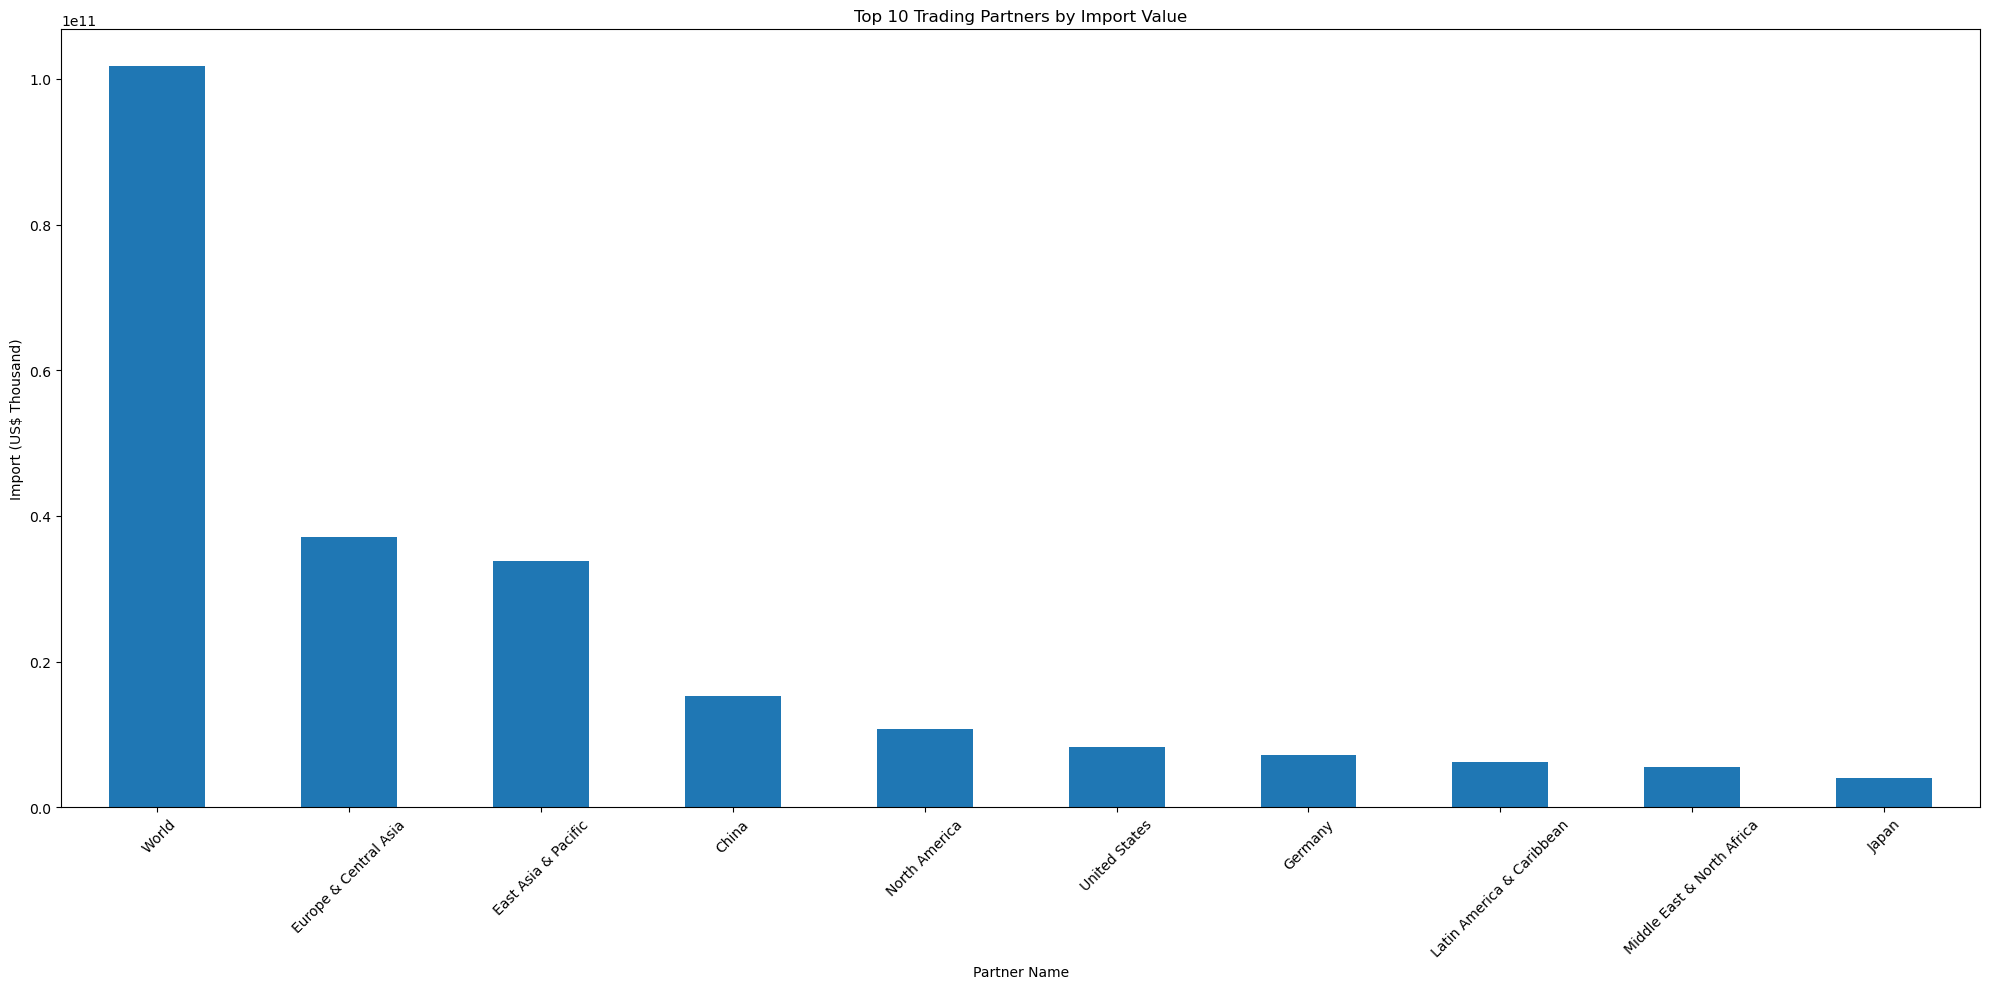

In [14]:
top_partners = df.groupby('Partner Name')['Import (US$ Thousand)'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(20, 10))
top_partners.plot(kind='bar', ax=ax)
ax.set_title("Top 10 Trading Partners by Import Value")
ax.set_ylabel("Import (US$ Thousand)")
ax.set_xlabel("Partner Name")
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

/home/amina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/amina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/amina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/amina/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

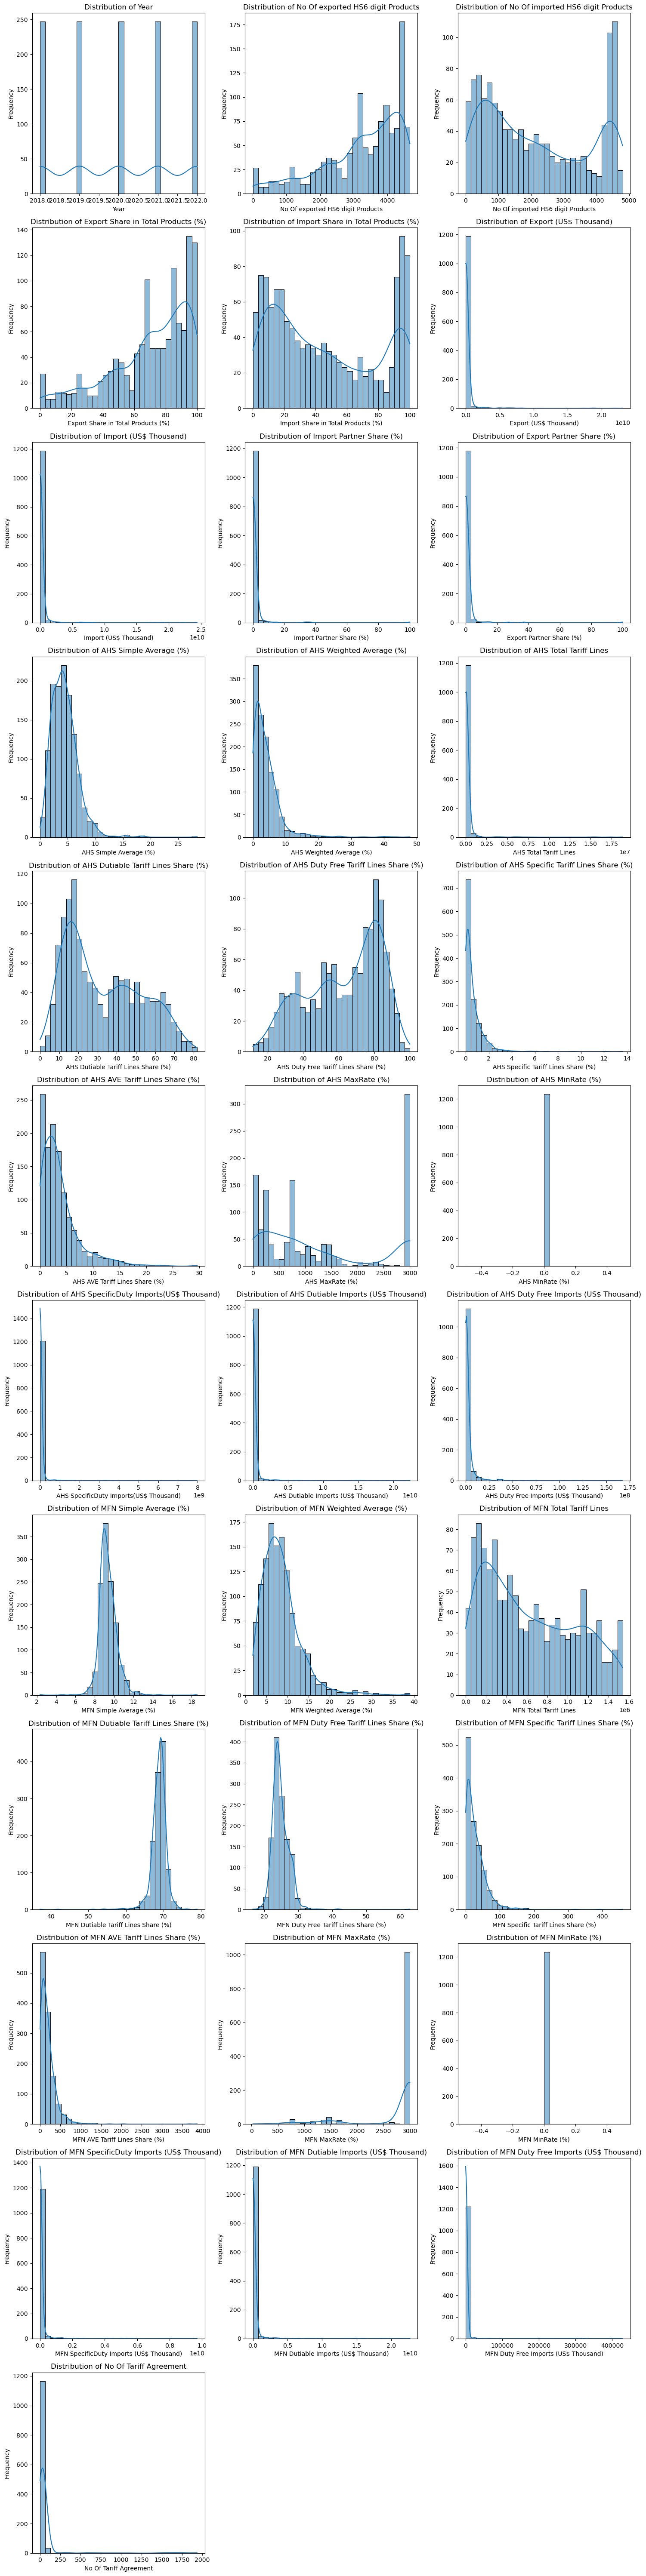

In [15]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 5 * ((len(numeric_cols) + 2) // 3)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

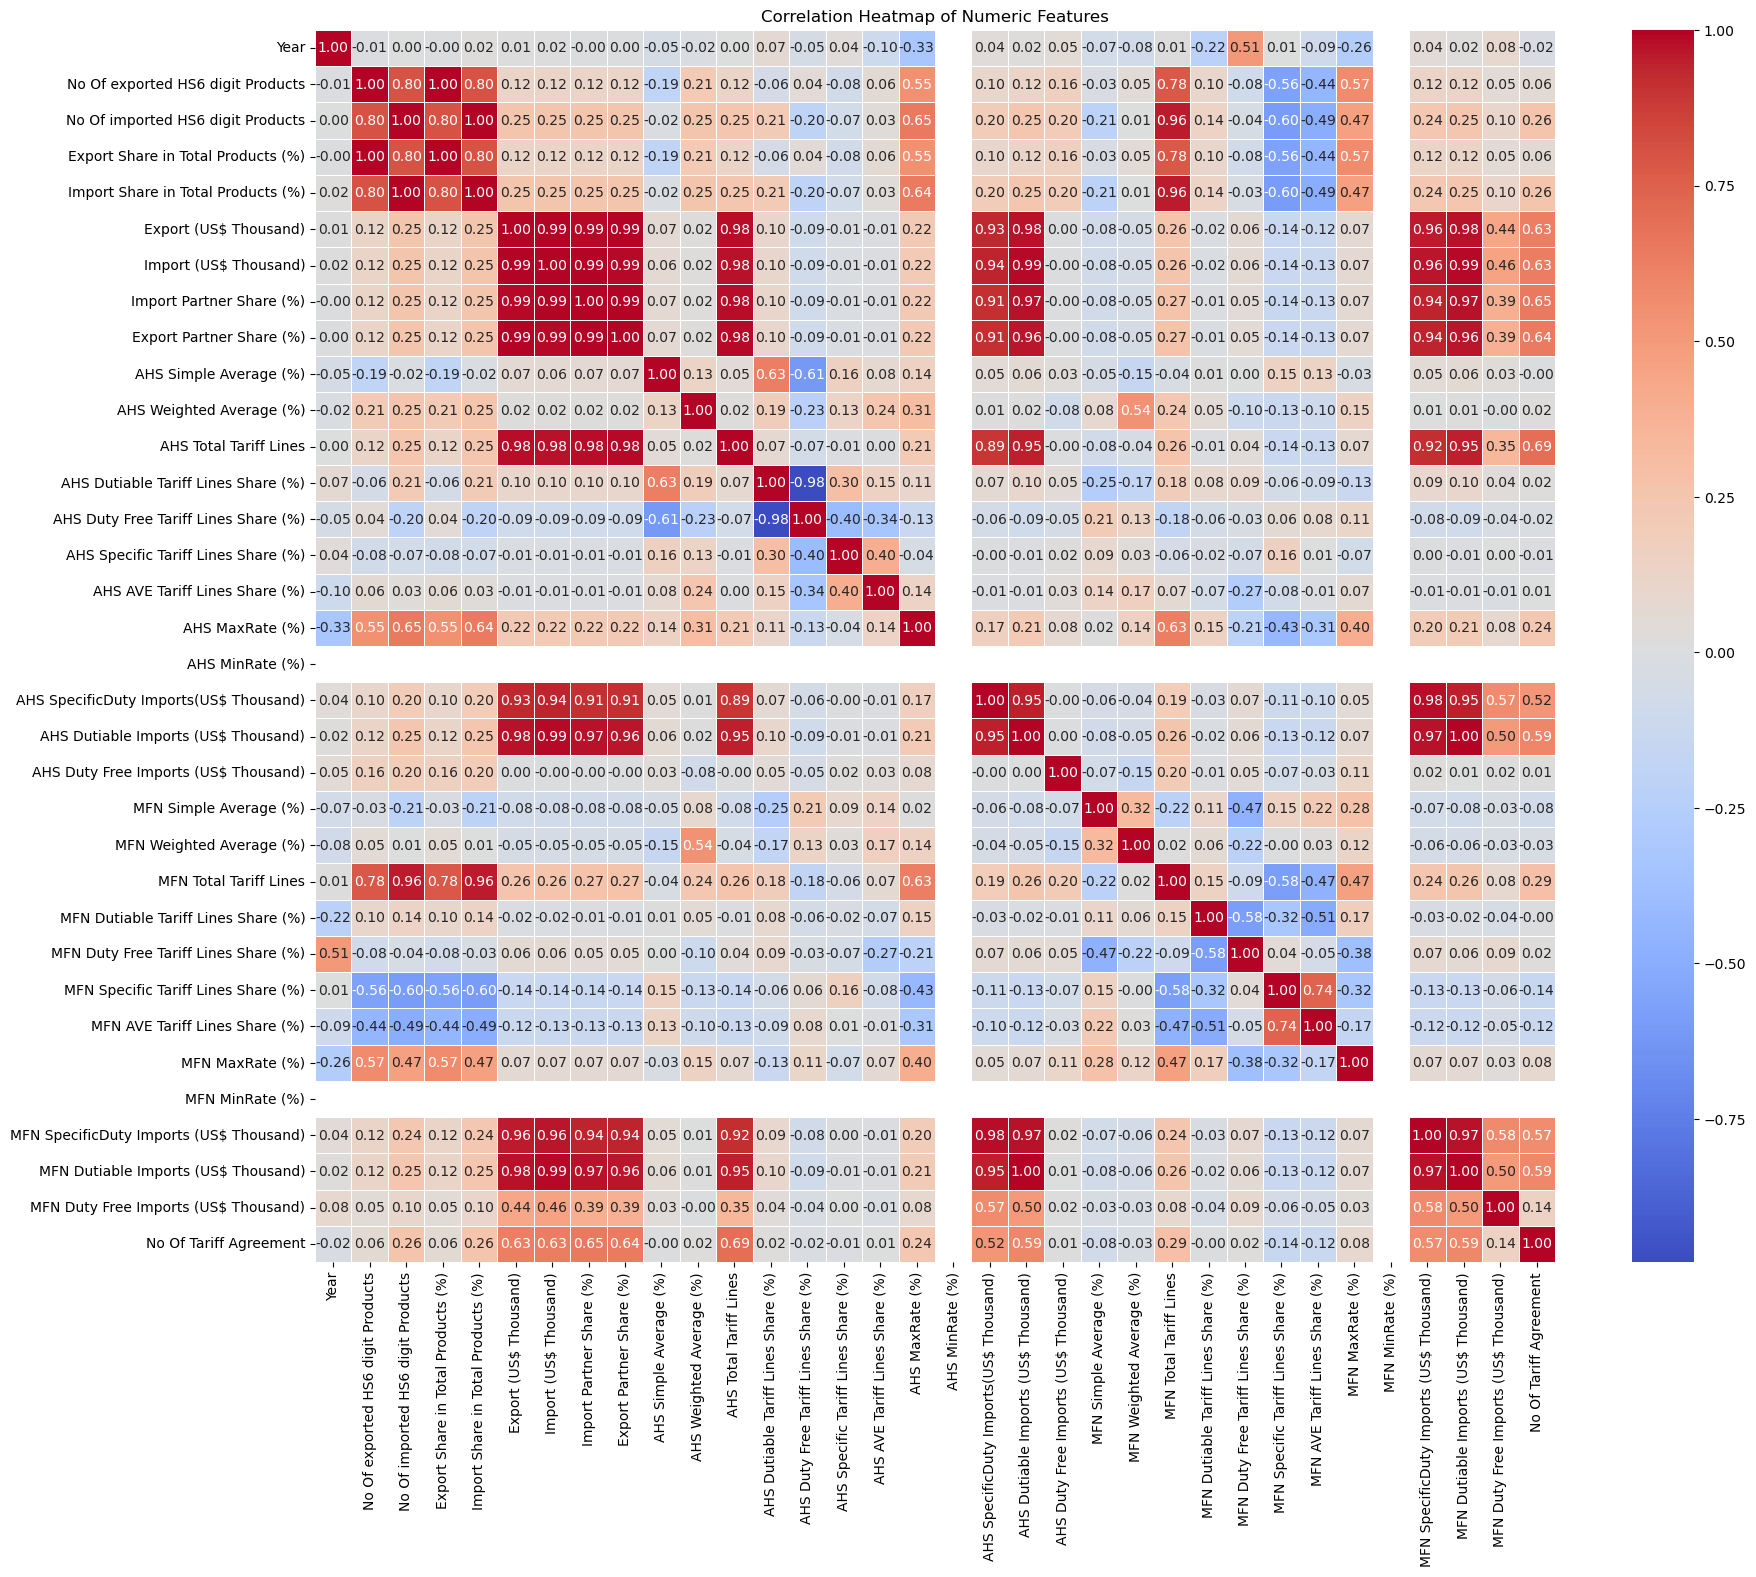

In [16]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

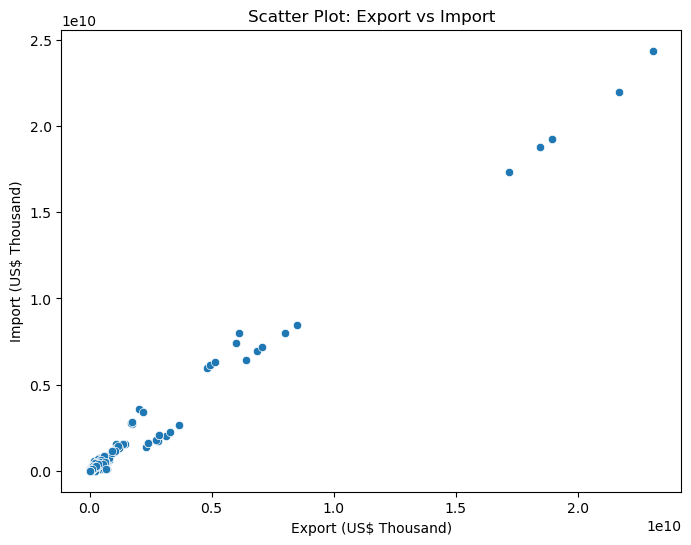

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Export (US$ Thousand)', y='Import (US$ Thousand)', data=df)
plt.title("Scatter Plot: Export vs Import")
plt.xlabel("Export (US$ Thousand)")
plt.ylabel("Import (US$ Thousand)")
plt.show()

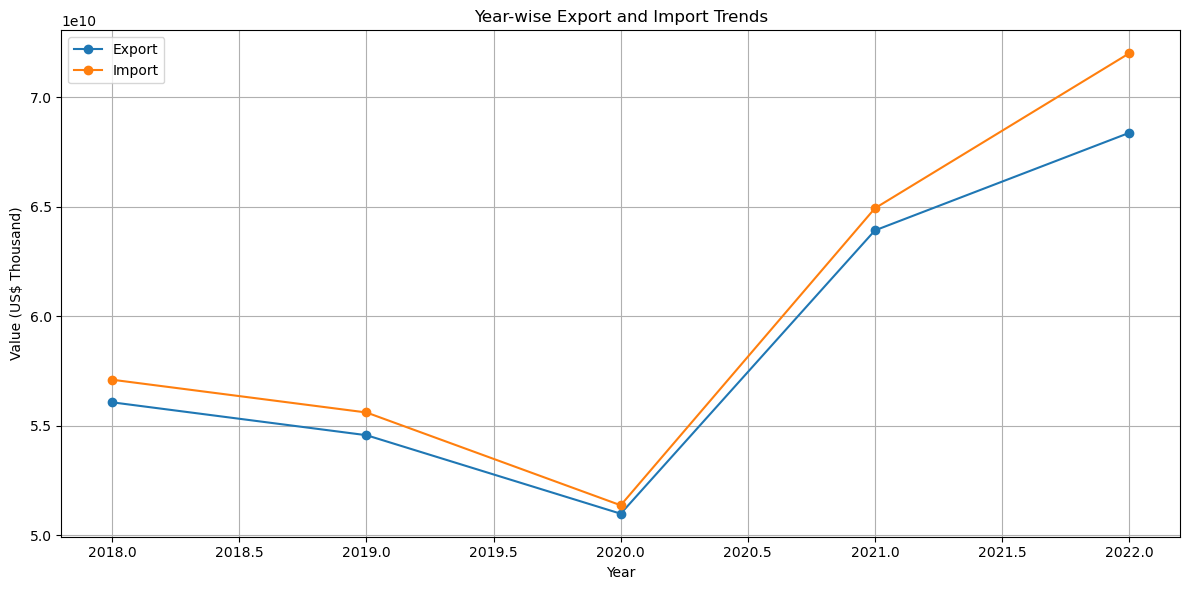

In [18]:
yearly_trade = df.groupby('Year')[['Export (US$ Thousand)', 'Import (US$ Thousand)']].sum()

yearly_trade.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Year-wise Export and Import Trends")
plt.xlabel("Year")
plt.ylabel("Value (US$ Thousand)")
plt.legend(['Export', 'Import'])
plt.grid(True)
plt.tight_layout()
plt.show()

## Apply CA

In [19]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Reporter Name', 'Partner Name', 'Trade Flow']

In [20]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Reporter Name: 1 unique values
Partner Name: 247 unique values
Trade Flow: 1 unique values


In [21]:
df['Export Bin'] = pd.qcut(df['Export (US$ Thousand)'], q=4, labels=["Low", "Medium", "High", "Very High"])

contingency_table = pd.crosstab(df['Partner Name'], df['Export Bin'])

print("Contingency table shape:", contingency_table.shape)

Contingency table shape: (247, 4)


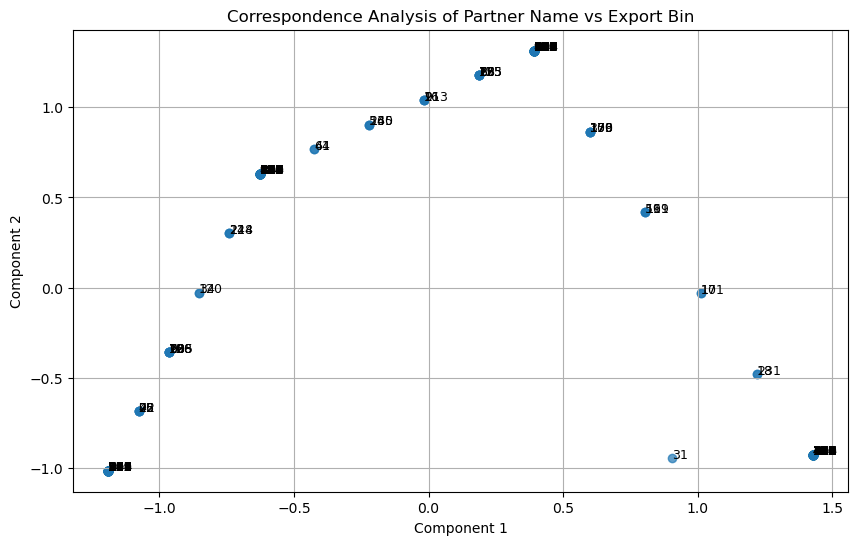

In [22]:
import prince
import matplotlib.pyplot as plt

ca = prince.CA(n_components=2, random_state=42)
ca = ca.fit(contingency_table)

row_coords = ca.row_coordinates(contingency_table)

plt.figure(figsize=(10, 6))
plt.scatter(row_coords[0], row_coords[1], alpha=0.7)

for i in range(row_coords.shape[0]):
    plt.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], str(i), fontsize=9)

plt.title('Correspondence Analysis of Partner Name vs Export Bin')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


In [23]:
ca = prince.CA(n_components=2, random_state=42)
ca.fit(contingency_table)

total_inertia = sum(ca.eigenvalues_)
explained_inertia = [eig / total_inertia for eig in ca.eigenvalues_]
print("Explained Inertia:", explained_inertia)

Explained Inertia: [0.5155842751418196, 0.4844157248581803]


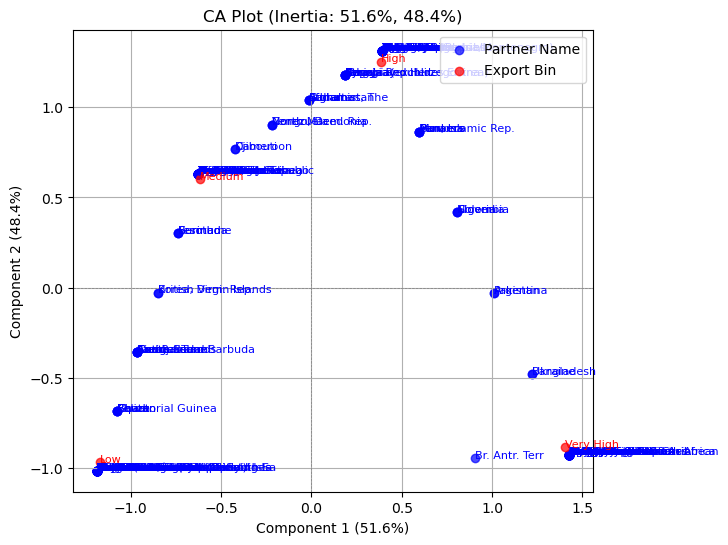

In [24]:
import prince
import matplotlib.pyplot as plt

ca = prince.CA(n_components=2, random_state=42)
ca.fit(contingency_table)

row_coords = ca.row_coordinates(contingency_table)
col_coords = ca.column_coordinates(contingency_table)
explained_inertia = [eig / sum(ca.eigenvalues_) for eig in ca.eigenvalues_]

plt.figure(figsize=(10, 6))
plt.scatter(row_coords[0], row_coords[1], c='blue', label='Partner Name', alpha=0.7)
plt.scatter(col_coords[0], col_coords[1], c='red', label='Export Bin', alpha=0.7)

for i, txt in enumerate(row_coords.index):
    plt.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], txt, fontsize=8, color='blue')
for i, txt in enumerate(col_coords.index):
    plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], txt, fontsize=8, color='red')

plt.title(f"CA Plot (Inertia: {explained_inertia[0]:.1%}, {explained_inertia[1]:.1%})")
plt.xlabel(f"Component 1 ({explained_inertia[0]:.1%})")
plt.ylabel(f"Component 2 ({explained_inertia[1]:.1%})")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal')  
plt.show()

In [25]:
explained_inertia = [eig / sum(ca.eigenvalues_) for eig in ca.eigenvalues_]

row_coords = ca.row_coordinates(contingency_table)
row_coords.columns = [f"Component {i+1} ({explained_inertia[i]:.1%})" for i in range(row_coords.shape[1])]
print("\nRow Coordinates (Partner Names):")
print(row_coords.head())  

col_coords = ca.column_coordinates(contingency_table)
col_coords.columns = [f"Component {i+1} ({explained_inertia[i]:.1%})" for i in range(col_coords.shape[1])]
print("\nColumn Coordinates (Export Bins):")
print(col_coords)


Row Coordinates (Partner Names):
                Component 1 (51.6%)  Component 2 (48.4%)
Partner Name                                            
 World                     1.427156            -0.925328
Afghanistan               -0.016472             1.039555
Albania                   -0.627064             0.630579
Algeria                    0.390589             1.312205
American Samoa            -1.189417            -1.013209

Column Coordinates (Export Bins):
            Component 1 (51.6%)  Component 2 (48.4%)
Export Bin                                          
Low                   -1.170224            -0.966258
Medium                -0.616946             0.601358
High                   0.384286             1.251399
Very High              1.404127            -0.882450


In [26]:
import pandas as pd
print("Contingency Table Summary:")
print(contingency_table.shape)  
print(contingency_table.sum())  

Contingency Table Summary:
(247, 4)
Export Bin
Low          309
Medium       309
High         308
Very High    309
dtype: int64


In [27]:
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared p-value: {p:.4f}") 

Chi-squared p-value: 0.0000
